<a href="https://colab.research.google.com/github/RJ2517/python-ml-projects/blob/main/LinearRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_csv("mumbai_house_data.csv")
data.head()


,Area,Size_sqft,Rooms,Distance_from_CST_km,Price
0,Andheri,850,2,18,18000000
1,Andheri,1100,3,18,26000000
2,Bandra,900,2,12,30000000
3,Bandra,1200,3,12,42000000
4,Borivali,750,2,30,14000000


In [ ]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Area                  16 non-null     object
 1   Size_sqft             16 non-null     int64 
 2   Rooms                 16 non-null     int64 
 3   Distance_from_CST_km  16 non-null     int64 
 4   Price                 16 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 772.0+ bytes
None
         Size_sqft      Rooms  Distance_from_CST_km         Price
count    16.000000  16.000000             16.000000  1.600000e+01
mean    968.750000   2.500000             20.875000  2.387500e+07
std     164.189931   0.516398              8.492153  8.539126e+06
min     700.000000   2.000000             10.000000  1.200000e+07
25%     850.000000   2.000000             14.250000  1.775000e+07
50%     925.000000   2.500000             20.000000  2.250000e+07
75%    1100.000000   3.000

In [ ]:
print(data.isnull().sum())
data = data.dropna()

Area                    0
Size_sqft               0
Rooms                   0
Distance_from_CST_km    0
Price                   0
dtype: int64


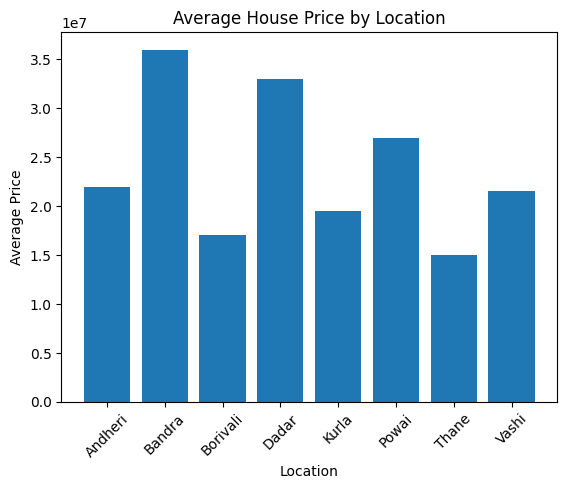

In [ ]:
avg_price_location = data.groupby("Area")["Price"].mean()

plt.bar(avg_price_location.index, avg_price_location.values)
plt.xlabel("Location")
plt.ylabel("Average Price")
plt.title("Average House Price by Location")
plt.xticks(rotation=45)
plt.show()

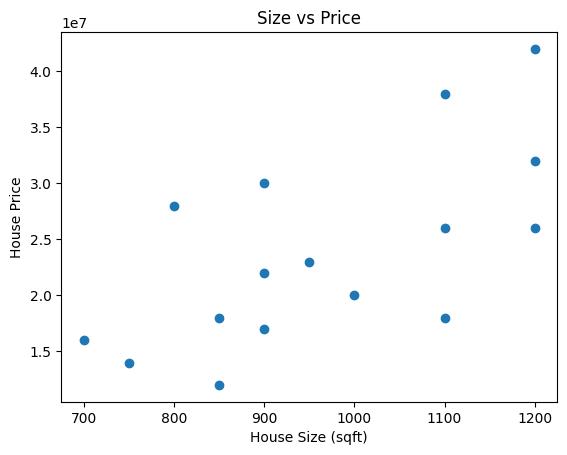

In [ ]:
plt.scatter(data["Size_sqft"], data["Price"])
plt.xlabel("House Size (sqft)")
plt.ylabel("House Price")
plt.title("Size vs Price")
plt.show()

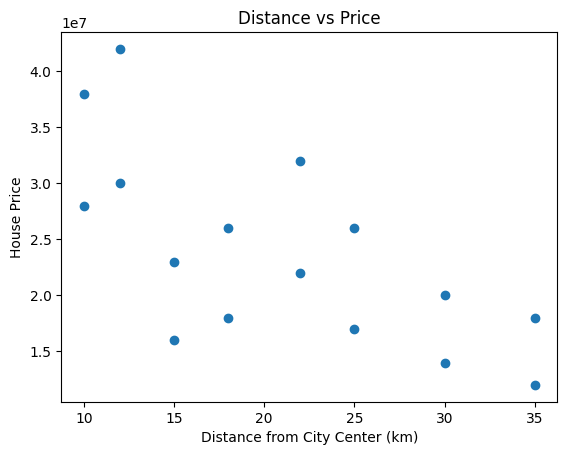

In [ ]:
plt.scatter(data["Distance_from_CST_km"], data["Price"])
plt.xlabel("Distance from City Center (km)")
plt.ylabel("House Price")
plt.title("Distance vs Price")
plt.show()

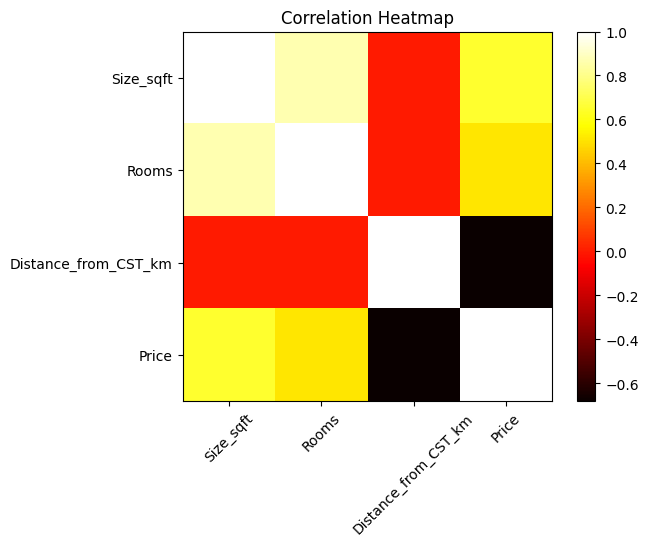

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()

plt.imshow(correlation, cmap="hot")
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
encoder = LabelEncoder()
data["Area"] = encoder.fit_transform(data["Area"])

In [ ]:
X = data.drop("Price", axis=1)
y = data["Price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 5030356.858021455
MSE: 43421871621704.74
R² Score: -2.562820235627056


In [ ]:
# Example input: Area, Size, Rooms, Distance
area_code = encoder.transform(["Bandra"])  # change if needed

new_house = np.array([[area_code[0], 1000, 3, 12]])
predicted_price = model.predict(new_house)

print("Predicted House Price:", predicted_price[0])

Predicted House Price: 32015501.839821123


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
